# POP/ RQ2 analysis prep

# Purpose 
The purpose of this notebook is to set up and create all the fields we will need for proper analysis of GDP for example creating columns with all the nomrailsed values of Population, Population density, Rating Share etc. We also create this Rating field so countries performance can be compared. The nomralisation that occurs in this notebook will provide and overall look and poulation, individual games will be address in the 400_RQ2_ Pop_Short notebook

# Datasets
Uses: <br>
** pop.csv ** from 300-Population-CSV in final <br>
Creates: <br>
** population.csv ** a csv with all the required fields for proper Population analysis. 

In [1]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
import string
import sys, os

In [2]:
# Ensure the file exists
if not os.path.exists(  r"..\..\data\final\pop.csv" ):
    print("Missing dataset file")

Missing dataset file


In [3]:
# read the medal csv into a dataframe
df = pd.read_csv(  r"..\..\data\final\pop.csv", encoding = "ISO-8859-1")

FileNotFoundError: File b'..\\..\\data\\final\\pop.csv' does not exist

In [ ]:
#First we'll drop all unnecessary columns 
df = df.drop(df.columns[[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28 ]], axis=1)

In [ ]:
# looking at the GDP dataset
df.columns

# Normalization of Population 
We will be using min max normalization to do this. Minmax normalization will take a given GDP value x and apply the following formula to get all the normalised values y for GDP. y = (x - min(x)) / (max(x) - min(x))  

In [ ]:
# min and max values 
maxPop = df['Population'].max()
minPop = df['Population'].min()

In [ ]:
df['Norm_POP'] = (df['Population'] - minPop) / (maxPop - minPop) 

In [4]:
df.head(3)

NameError: name 'df' is not defined

# Normalization of Population Density 
Again, We will be using min max normalization to do this. Minmax normalization will take a given GDP Per Capita value x and apply the following formula to get all the normalised values y for GDP Per Capita. y = (x - min(x)) / (max(x) - min(x))  

In [5]:
# min and max values 
maxPD = df['Population_Density'].max()
minPD = df['Population_Density'].min()

NameError: name 'df' is not defined

In [6]:
df['Norm_POPD'] = (df['Population_Density'] - minPD) / (maxPD - minPD) 

NameError: name 'df' is not defined

In [7]:
df.head(3)

NameError: name 'df' is not defined

# Normalization of Gold Share
We will be using min max normalization to do this. Minmax normalization will take each give value of Gold share x and apply the following formula to get all the normalised values y for the Gold Share. y = (x - min(x)) / (max(x) - min(x))  

In [12]:
# min and max values 
maxGold = df['Gold_Share'].max()
minGold = df['Gold_Share'].min()

In [13]:
df['Norm_Gold_Share'] = (df['Gold_Share'] - minGold) / (maxGold - minGold) 

In [14]:
df.head(3)

,Country,Host_City,Year,Gold_Share,Medal_Share,Rating_Share,Males,Females,Summer,Winter,...,Population,NOC_Males_Sent,NOC_Females_Sent,NOC_Total_Sent,Female_Representation,Male_Representation,Population_Representation,Norm_POP,Norm_POPD,Norm_Gold_Share
0,Afghanistan,Beijing,2008,0.000000,0.000490,0.000248,14054874.0,13239157.0,True,False,...,27294031.0,3.0,1.0,4.0,7.553351e-08,2.134491e-07,1.465522e-07,0.019780,0.005080,0.000000
1,Afghanistan,London,2012,0.000000,0.000514,0.000260,15784301.0,14912657.0,True,False,...,30696958.0,5.0,1.0,6.0,6.705713e-08,3.167704e-07,1.954591e-07,0.022249,0.005726,0.000000
2,Algeria,Atlanta,1996,0.003252,0.001616,0.001894,14898762.0,14512653.0,True,False,...,29411415.0,38.0,6.0,44.0,4.134323e-07,2.550547e-06,1.496018e-06,0.021316,0.001466,0.005813


# Normalization of Total Medal Share
We will be using min max normalization to do this. Minmax normalization will take each give value of Total Medal share x and apply the following formula to get all the normalised values y for the Total Medal Share. y = (x - min(x)) / (max(x) - min(x))  

In [15]:
# min and max values 
maxTMedal = df['Medal_Share'].max()
minTMedal = df['Medal_Share'].min()

In [16]:
df['Norm_Total_Medal_Share'] = (df['Medal_Share'] - minTMedal) / (maxTMedal - minTMedal) 

In [17]:
df.head(3)

,Country,Host_City,Year,Gold_Share,Medal_Share,Rating_Share,Males,Females,Summer,Winter,...,NOC_Males_Sent,NOC_Females_Sent,NOC_Total_Sent,Female_Representation,Male_Representation,Population_Representation,Norm_POP,Norm_POPD,Norm_Gold_Share,Norm_Total_Medal_Share
0,Afghanistan,Beijing,2008,0.000000,0.000490,0.000248,14054874.0,13239157.0,True,False,...,3.0,1.0,4.0,7.553351e-08,2.134491e-07,1.465522e-07,0.019780,0.005080,0.000000,0.000000
1,Afghanistan,London,2012,0.000000,0.000514,0.000260,15784301.0,14912657.0,True,False,...,5.0,1.0,6.0,6.705713e-08,3.167704e-07,1.954591e-07,0.022249,0.005726,0.000000,0.000039
2,Algeria,Atlanta,1996,0.003252,0.001616,0.001894,14898762.0,14512653.0,True,False,...,38.0,6.0,44.0,4.134323e-07,2.550547e-06,1.496018e-06,0.021316,0.001466,0.005813,0.001847


# Normalization of Total Rating Share
We will be using min max normalization to do this. Minmax normalization will take each give value of Total Rating share x and apply the following formula to get all the normalised values y for the Total Rating Share. y = (x - min(x)) / (max(x) - min(x)) 

In [18]:
# min and max values 
maxTRate = df['Rating_Share'].max()
minTRate = df['Rating_Share'].min()

In [19]:
df['Norm_Rating_Share'] = (df['Rating_Share'] - minTRate) / (maxTRate - minTRate) 

In [20]:
df.head(3)

,Country,Host_City,Year,Gold_Share,Medal_Share,Rating_Share,Males,Females,Summer,Winter,...,NOC_Females_Sent,NOC_Total_Sent,Female_Representation,Male_Representation,Population_Representation,Norm_POP,Norm_POPD,Norm_Gold_Share,Norm_Total_Medal_Share,Norm_Rating_Share
0,Afghanistan,Beijing,2008,0.000000,0.000490,0.000248,14054874.0,13239157.0,True,False,...,1.0,4.0,7.553351e-08,2.134491e-07,1.465522e-07,0.019780,0.005080,0.000000,0.000000,0.000000
1,Afghanistan,London,2012,0.000000,0.000514,0.000260,15784301.0,14912657.0,True,False,...,1.0,6.0,6.705713e-08,3.167704e-07,1.954591e-07,0.022249,0.005726,0.000000,0.000039,0.000025
2,Algeria,Atlanta,1996,0.003252,0.001616,0.001894,14898762.0,14512653.0,True,False,...,6.0,44.0,4.134323e-07,2.550547e-06,1.496018e-06,0.021316,0.001466,0.005813,0.001847,0.003294


# A few Quick Visualisations 

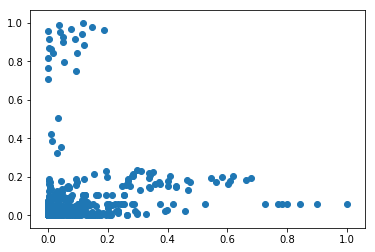

In [22]:
plt.scatter(df.Norm_Rating_Share, df.Norm_POP)

# GDP PER CAPITA

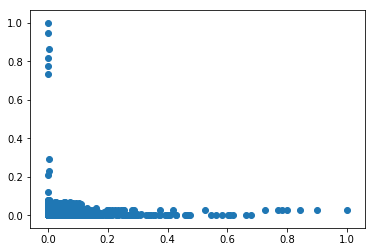

In [23]:
plt.scatter(df.Norm_Rating_Share, df.Norm_POPD)

In [25]:
df.to_csv(r"..\..\data\final\populationA.csv", index=False)